In [3]:
import pandas as pd 
import numpy as np 
import math

DF_TRAIN = pd.read_csv('TrainsDataSet.csv',sep=',')
##print(DF_TRAIN)
DF_TRAIN = DF_TRAIN[['Number_of_cars','Number_of_different_loads','num_wheels1','length1','shape1','num_loads1','load_shape1','num_wheels2','length2','shape2','num_loads2','load_shape2','num_wheels3','length3','shape3','num_loads3','load_shape3','num_wheels4','length4','shape4','num_loads4','load_shape4','Rectangle_next_to_rectangle','Rectangle_next_to_triangle','Rectangle_next_to_hexagon','Rectangle_next_to_circle','Triangle_next_to_triangle','Triangle_next_to_hexagon','Triangle_next_to_circle','Hexagon_next_to_hexagon','Hexagon_next_to_circle','Circle_next_to_circle','class']]
#print(DF_TRAIN)

class Tree:
	def __init__(self,observationIDs,features,currLvl=0,subTree={},bestFeature=None,majorityLabel=None,parentMajorityLabel=None):
		self.observationIDs = observationIDs
		self.features = features
		self.currLvl = currLvl
		self.subTree = subTree
		self.bestFeature = bestFeature
		self.majorityLabel = majorityLabel
		self.parentMajorityLabel = parentMajorityLabel
		self.setBestFeatureID(bestFeature)

	# predictions en utilisant un arbre et 
	# des observations : ['Number_of_cars','Number_of_different_loads','num_wheels1','length1','shape1','num_loads1','load_shape1',
    #'num_wheels2','length2','shape2','num_loads2','load_shape2','num_wheels3','length3','shape3','num_loads3','load_shape3',
    #'num_wheels4','length4','shape4','num_loads4','load_shape4','Rectangle_next_to_rectangle','Rectangle_next_to_triangle',
    #'Rectangle_next_to_hexagon','Rectangle_next_to_circle','Triangle_next_to_triangle','Triangle_next_to_hexagon',
#    'Triangle_next_to_circle','Hexagon_next_to_hexagon','Hexagon_next_to_circle','Circle_next_to_circle','class']

	def setBestFeatureID(self, feature):
		idx = None
		if feature == 'Number_of_cars':
			idx= 0
		elif feature == 'Number_of_different_loads':
			idx= 1
		elif feature == 'num_wheels1':
			idx= 2
		if feature == 'length1':
			idx= 3
		elif feature == 'shape1':
			idx= 4
		elif feature == 'num_loads1':
			idx= 5
		if feature == 'load_shape1':
			idx= 6
		elif feature == 'num_wheels2':
			idx= 7
		elif feature == 'length2':
			idx= 8
		if feature == 'shape2':
			idx= 9
		elif feature == 'num_loads2':
			idx= 10
		elif feature == 'load_shape2':
			idx= 11
		if feature == 'num_wheels3':
			idx= 12
		elif feature == 'length3':
			idx= 13
		elif feature == 'shape3':
			idx= 14
		if feature == 'num_loads3':
			idx= 15
		elif feature == 'num_loads3':
			idx= 16
		else:
			idx= 17
		self.bestFeatureID = int(idx)

def predict(tree, obs):
	if tree.bestFeature == None:
		return tree.majorityLabel
	featVal = obs[tree.bestFeatureID]
	if not featVal in tree.subTree: # valeur sans sous arbre
		return tree.majorityLabel
	else: # recursivite sur le subtree
		return predict(tree.subTree[featVal],obs)

def displayDecisionTree(tree):
	print('\t'*tree.currLvl + '(lvl {}) {}'.format(tree.currLvl,tree.majorityLabel))
	if tree.bestFeature == None:
		return

	print('\t'*tree.currLvl + '{}'.format(tree.bestFeature) + ': ')
	for [val,subTree] in sorted(tree.subTree.items()):
		print('\t'*(tree.currLvl+1) + 'Valeur: {}'.format(val))
		displayDecisionTree(subTree)

def Entropy(ns):
	entropy = 0.0
	total = sum(ns)
	for x in ns:
		entropy += -1.0*x/total*math.log(1.0*x/total,2)
	return entropy

# calcul du Gain d'information
def IG(observationIDs, feature):
	# obtenir une dataset petit
	df = DF_TRAIN.loc[observationIDs]
	# renseigner les comptes pour est / ouest pour chaque catégorie de l'entité
	labelCountDict = {}
	valueLabelCountDict = {}
	for index, row in df.iterrows():
		label = row['class']
		if not label in labelCountDict:
			labelCountDict[label] = 0 # cette étiquette spécifique n'a pas été trouvée, donc insérez 0 nombre
		labelCountDict[label] += 1
		featureValue = row[feature]
		if not featureValue in valueLabelCountDict:
			valueLabelCountDict[featureValue] = {} # cette valeur de fonctionnalité spécifique non trouvée alors insérez un dict vide
		if not label in valueLabelCountDict[featureValue]:
			valueLabelCountDict[featureValue][label] = 0 # cette étiquette spécifique n'a pas été trouvée pour cette valeur de fonctionnalité afin d'insérer 0 nombre
		valueLabelCountDict[featureValue][label] += 1

	ns = []
	for [label,count] in labelCountDict.items():
		ns.append(count)

	H_Y = Entropy(ns)

	H_Y_X = 0.0
	for [featureValue, labelCountDict] in valueLabelCountDict.items():
		nsHYX = []
		for [label,count] in labelCountDict.items():
			nsHYX.append(count)
		H_Y_X += 1.0*sum(nsHYX)/len(df)*Entropy(nsHYX)
	return H_Y - H_Y_X

def GR(observationIDs, feature):
	ig = IG(observationIDs,feature)
	if ig == 0:
		return 0
	df = DF_TRAIN.loc[observationIDs]
	valueLabelDict = {}
	for index, row in df.iterrows():
		label = row['class']
		featureValue = row[feature]
		if featureValue not in valueLabelDict:
			valueLabelDict[featureValue] = 0
		valueLabelDict[featureValue] += 1
	ns = []
	for [val,count] in valueLabelDict.items():
		ns.append(count)
	ent = Entropy(ns)
	return float(ig)/ent

def fillDecisionTree(tree):
	# trouver le Label majoritaire
	df = DF_TRAIN.loc[tree.observationIDs] # petit dataframe
	counts = df['class'].value_counts()
	majorityLabel = df['class'].value_counts().idxmax()
	if len(counts) > 1:
		if counts['east'] == counts['west']:
			majorityLabel = tree.parentMajorityLabel
	tree.majorityLabel = majorityLabel

	# exit if only one label
	if len(counts) == 1:
		return
	# exit si aucun features reste
	if len(tree.features) == 0: 
		return

	# trouver le best feature
	featureValueDict = {}
	for feature in tree.features: 
		metricScore = GR(tree.observationIDs,feature)
		featureValueDict[feature] = metricScore
	bestFeature, bestFeatureValue = sorted(featureValueDict.items(),reverse=True)[0]
	# exit if IG or GR is 0
	if bestFeatureValue == 0.0:
		return
	tree.bestFeature = bestFeature

	# trouver le sous-ensemble des features
	subFeatures = set()
	for feature in tree.features:
		if feature == bestFeature: # ignorer la meilleure feature actuelle
			continue
		subFeatures.add(feature)
	#class
	# trouver le best feature id
	bestFeatureIdx = 0
	if bestFeature == 'Number_of_cars':
		bestFeatureIdx = 0
	elif bestFeature == 'Number_of_different_loads':
		bestFeatureIdx = 1
	elif bestFeature == 'num_wheels1':
		bestFeatureIdx = 2
	if bestFeature == 'length1':
		bestFeatureIdx = 3
	elif bestFeature == 'shape1':
		bestFeatureIdx = 4
	elif bestFeature == 'num_loads1':
		bestFeatureIdx = 5
	if bestFeature == 'load_shape1':
		bestFeatureIdx = 6
	elif bestFeature == 'num_wheels2':
		bestFeatureIdx = 7
	elif bestFeature == 'length2':
		bestFeatureIdx = 8
	if bestFeature == 'shape2':
		bestFeatureIdx = 9
	elif bestFeature == 'num_loads2':
		bestFeatureIdx = 10
	elif bestFeature == 'load_shape2':
		bestFeatureIdx = 11
	if bestFeature == 'num_wheels3':
		bestFeatureIdx = 12
	elif bestFeature == 'length3':
		bestFeatureIdx = 13
	elif bestFeature == 'shape3':
		bestFeatureIdx = 14
	elif bestFeature == 'num_loads3':
		bestFeatureIdx = 15
	elif bestFeature == 'load_shape3':
		bestFeatureIdx = 16
	else:
		bestFeatureIdx = 17
	# trouver le sous-ensemble des observations
	subObservationsDict = {}
	for obs in tree.observationIDs:
		val = DF_TRAIN.values[obs][bestFeatureIdx]
		if not val in subObservationsDict:
			subObservationsDict[val] = set()
		subObservationsDict[val].add(obs)

	for [val,obs] in subObservationsDict.items():

		tree.subTree[val] = Tree(obs, subFeatures, tree.currLvl + 1,{},None,None,majorityLabel)
		
		fillDecisionTree(tree.subTree[val])

def predictAndAnalyze(tree, data):
	TP = 0.001
	FN = 0.001
	FP = 0.001
	TN = 0.001
	for obs in data:
		prediction = predict(tree,obs)
		ground = obs[4]
		if prediction == 'east' and ground == 'east':
			TP += 1
			print(TP)
		if prediction == 'east' and ground == 'west':
			FP += 1
		if prediction == 'west' and ground == 'east':
			FN += 1
		if prediction == 'west' and ground == 'west':
			TN += 1
	accuracy = float(TP+TN)/len(data)
	precision = float(TP)/((TP + FP))
	recall = float(TP)/((TP + FN))
	F1 = 2*(recall*precision)/((recall+precision))
	print('\nAnalysis:')
	print('accuracy = {}'.format(accuracy))
	print('precision = {}'.format(precision))
	print('recall = {}'.format(recall))
	print('F1 score = {}'.format(F1))


# Lire les données d'origine et obtenir un tableau de sous-ensemble avec les colonnes

dfTest = pd.read_csv('TrainsDataSet.csv',sep=',')
dfTest = dfTest[['Number_of_cars','Number_of_different_loads','num_wheels1','length1','shape1','num_loads1','load_shape1','num_wheels2','length2','shape2','num_loads2','load_shape2','num_wheels3','length3','shape3','num_loads3','load_shape3','num_wheels4','length4','shape4','num_loads4','load_shape4','Rectangle_next_to_rectangle','Rectangle_next_to_triangle','Rectangle_next_to_hexagon','Rectangle_next_to_circle','Triangle_next_to_triangle','Triangle_next_to_hexagon','Triangle_next_to_circle','Hexagon_next_to_hexagon','Hexagon_next_to_circle','Circle_next_to_circle','class']]

# obsIDs, features, lvl subTree, bestFeature, majority label, parent majority label
initialObservationIDs = set(range(len(DF_TRAIN)))
initialFeatures = set(dfTest.columns.values[:-1])

MyTree = Tree(initialObservationIDs,initialFeatures)
fillDecisionTree(MyTree)

print('Mon Decision Tree:')
displayDecisionTree(MyTree)

#print(dfTest.values)
#print(MyTree)
print('Predicted Labels of Test Data:')
predictAndAnalyze(MyTree,dfTest.values)


Mon Decision Tree:
(lvl 0) None
shape4: 
	Valeur: -
	(lvl 1) west
	shape3: 
		Valeur: -
		(lvl 2) west
		Valeur: closedrect
		(lvl 2) east
		Valeur: jaggedtop
		(lvl 2) west
	Valeur: 2
	(lvl 1) east
	shape3: 
		Valeur: ellipse
		(lvl 2) east
		Valeur: openrect
		(lvl 2) east
		shape2: 
			Valeur: 2
			(lvl 3) east
			shape1: 
				Valeur: 2
				(lvl 4) east
Predicted Labels of Test Data:

Analysis:
accuracy = 0.0002
precision = 0.5
recall = 0.5
F1 score = 0.5


## Using Sickit Learn

In [4]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder

In [5]:
# CHARGEMENT DU Dataset
df = pd.read_csv('TrainsDataSet.csv', sep=',')
df.head()

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,...,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,class
0,5,4,2,long,openrect,3,rectanglod,2,short,slopetop,...,1,0,0,0,1,0,0,1,0,east
1,4,3,2,short,ushaped,1,trianglod,2,short,opentrap,...,1,0,1,0,0,0,0,0,0,east
2,4,2,2,short,openrect,1,circlelod,2,short,hexagon,...,0,0,0,1,0,1,0,0,0,east
3,5,2,2,short,opentrap,1,trianglod,2,short,dblopnrect,...,1,0,0,1,0,0,0,0,0,east
4,4,3,2,short,dblopnrect,1,trianglod,3,long,closedrect,...,1,0,1,0,0,0,0,0,0,east


In [6]:
# Transformer les valeurs du "class" de east/west vers True/False
df['class'] = (df['class'] == 'east')

# Label Encoding categorical columns (assigning numbers to categories)
# Encodage Étiquetté de colonnes catégorielles (attribution de numéros à des catégories)
cat_columns = ['Number_of_cars','Number_of_different_loads','num_wheels1','length1','shape1','num_loads1','load_shape1','num_wheels2','length2','shape2','num_loads2','load_shape2','num_wheels3','length3','shape3','num_loads3','load_shape3','num_wheels4','length4','shape4','num_loads4','load_shape4','Rectangle_next_to_rectangle','Rectangle_next_to_triangle','Rectangle_next_to_hexagon','Rectangle_next_to_circle','Triangle_next_to_triangle','Triangle_next_to_hexagon','Triangle_next_to_circle','Hexagon_next_to_hexagon','Hexagon_next_to_circle','Circle_next_to_circle']
df[cat_columns] = df[cat_columns].apply(LabelEncoder().fit_transform)

# AFFICHAGE DU header
df.head()

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,...,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,class
0,2,3,0,0,2,1,1,0,1,6,...,1,0,0,0,1,0,0,1,0,True
1,1,2,0,1,4,0,2,0,1,5,...,1,0,1,0,0,0,0,0,0,True
2,1,1,0,1,2,0,0,0,1,2,...,0,0,0,1,0,1,0,0,0,True
3,2,1,0,1,3,0,2,0,1,1,...,1,0,0,1,0,0,0,0,0,True
4,1,2,0,1,1,0,2,1,0,0,...,1,0,1,0,0,0,0,0,0,True


In [7]:
# Create L'ARBRE DE DECISION
tree = DecisionTreeClassifier(criterion='entropy')
#print(df.drop('class', axis=1))
#print(df['class'])

# REMPLIR L'ARBRE DE DECISION
tree = tree.fit(df.drop('class', axis=1), df['class'])

# Print Tree
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

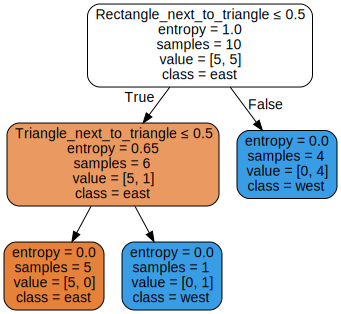

In [8]:
# LA VISUALISATION D'ARBRE
dot_data = export_graphviz(tree, out_file=None, feature_names=df.columns[:-1], class_names=['east', 'west'], 
                           filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph